# Run the whole deltas algorithm

In [10]:
%load_ext autoreload
%autoreload 2

import deltas
import numpy as np
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [11]:
binary = True
remove = []
remove = [2,3,4,5,6,7,8,9]
minority_id = [0]
split = 0.1
ratio = None
data_clf = data.get_real_dataset(
    'MNIST', scale=False, binary=binary, classes_remove=remove, minority_id=minority_id,
    split=split, ratio=ratio, equal_test=True)
# print(len(data_clf['data']['y']))
# print(sum(data_clf['data']['y']))
# import numpy as np
# print(np.unique(data_clf['data']['y']))
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

12665 5923
MNIST: 11928
Number of attribues: 784
Classes total: 6005 - 5923

Classes train: 674 - 592
Classes test:  5331 - 5331


In [12]:
print(np.unique(data_clf['data']['y']))
print(np.unique(data_clf['data_test']['y']))

[0 1]
[0 1]


## Get Classifier

In [23]:
epochs = 5
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model='MNIST',
                      binary=True,
                      epochs=epochs,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

for clf in ['Baseline', 'SMOTE']:
    print(clf, ':')
    classifiers_dict[clf].test(data_clf['data']['X'],
                            data_clf['data']['y'], data_s='train')
    classifiers_dict[clf].test(data_clf['data_test']['X'],
                            data_clf['data_test']['y'], data_s='test ')

Baseline :
train set: Accuracy: 0.9992101105845181
test  set: Accuracy: 0.9954980303882949
SMOTE :
train set: Accuracy: 0.9739336492890995
test  set: Accuracy: 0.9779591071093603


## Fit deltas

In [14]:
classifiers_dict['Baseline'].test(data_clf['data']['X'],
                           data_clf['data']['y'], data_s='train')

train set: Accuracy: 1.0


Original Data


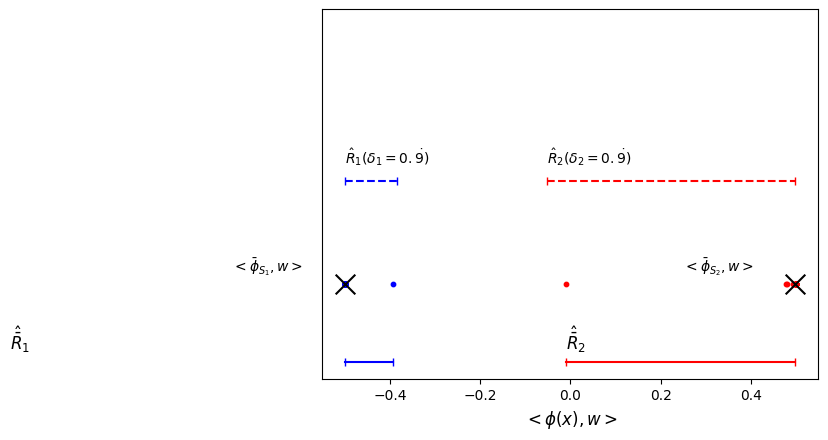

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


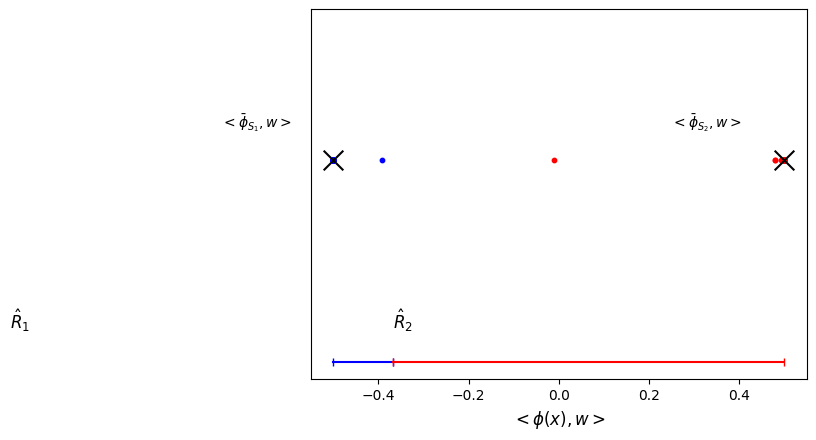

In [24]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                    #  method='supports-prop-update_mean-margin_only',
                                                     max_trials=1000,
                                                     parallel=True,
                                                     grid_search=False)

## Plot training data information

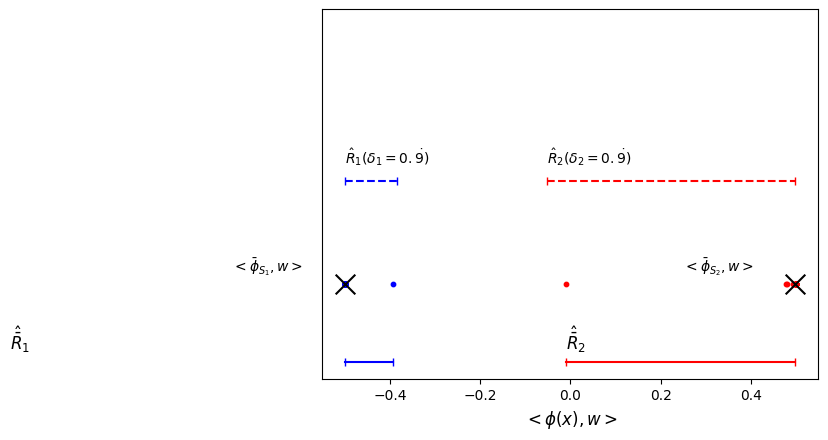

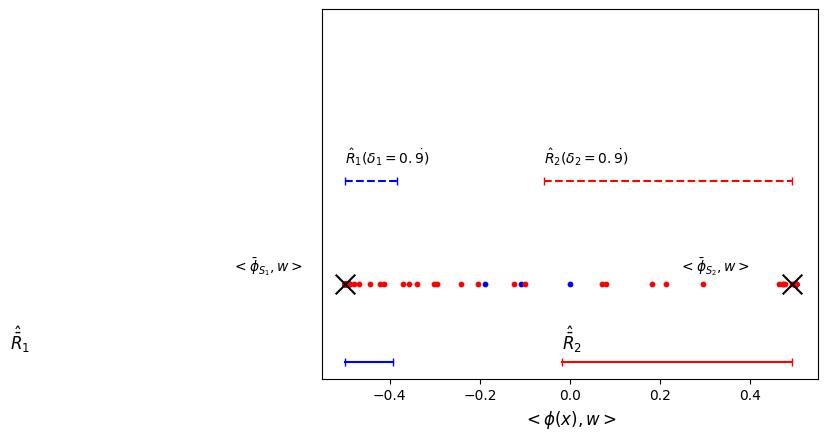

In [30]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data(data_clf['data'])
deltas_model.plot_data(data_clf['data_test'])

## Show parameters

In [26]:
deltas_model.print_params()

Parameters
                R:  0.5
                N1: 674
                N2: 592
                R1: 0.10690634699886559
                R2: 0.5089891765870758
                M:  0.3829917013645172
                D:  0.9988872249504586
                C1: 1
                C2: 1


# Evaluation on test data

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


            Accuracy    G-Mean   ROC-AUC        F1
Method                                            
Baseline    0.995498  0.995492  0.995498  0.995482
SMOTE       0.977959  0.977759  0.977959  0.978387
BMR         0.995498  0.995492  0.995498  0.995482
Threshold   0.995498  0.995492  0.995498  0.995482
Our Method  0.996061  0.996057  0.996061  0.996050 


Baseline


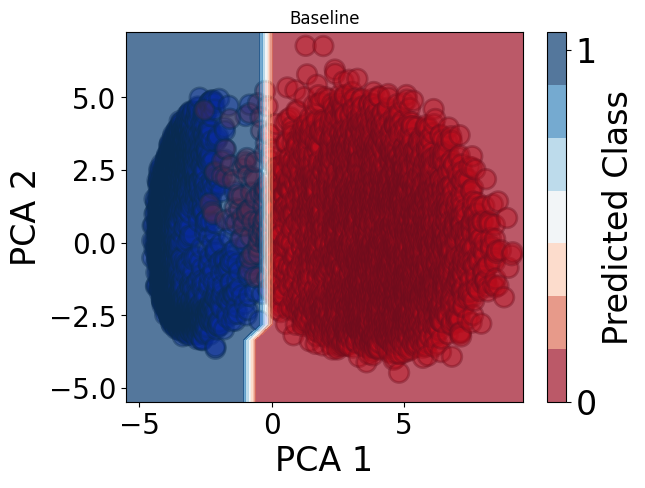

SMOTE


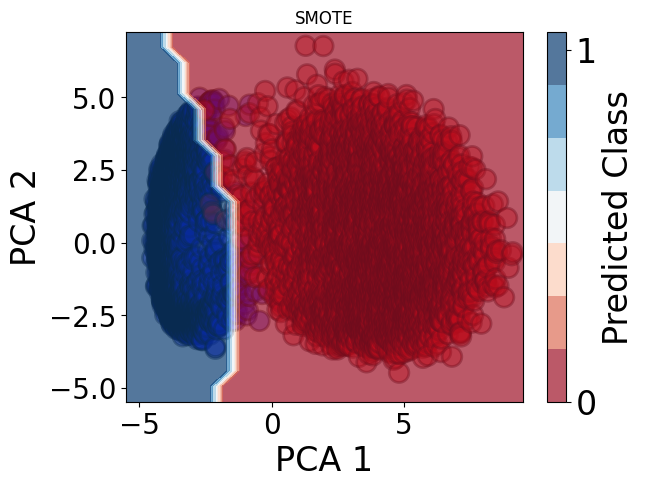

BMR


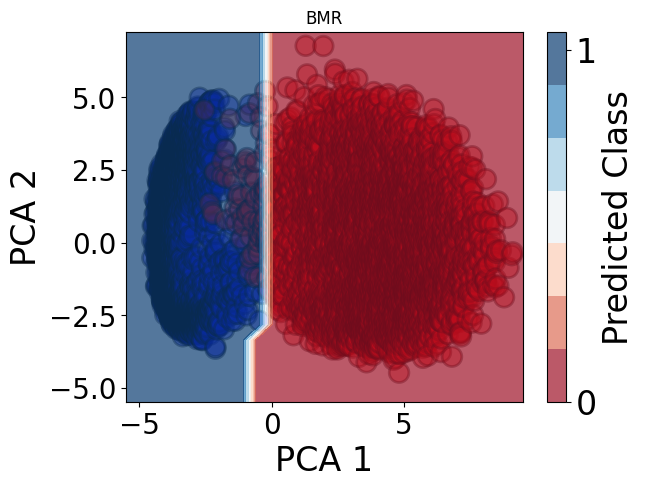

Threshold


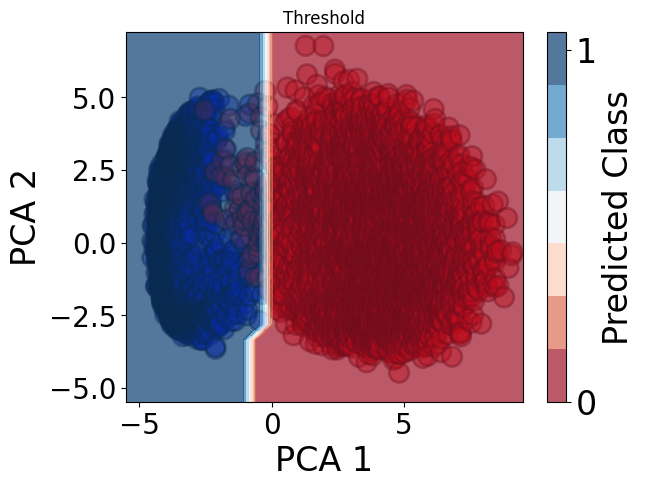

Our Method


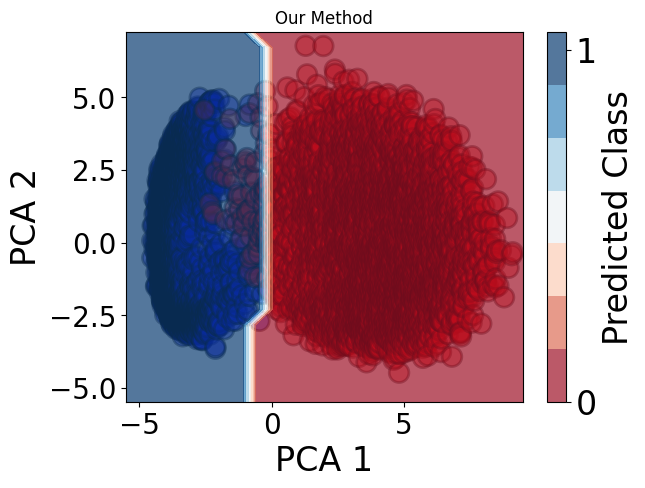

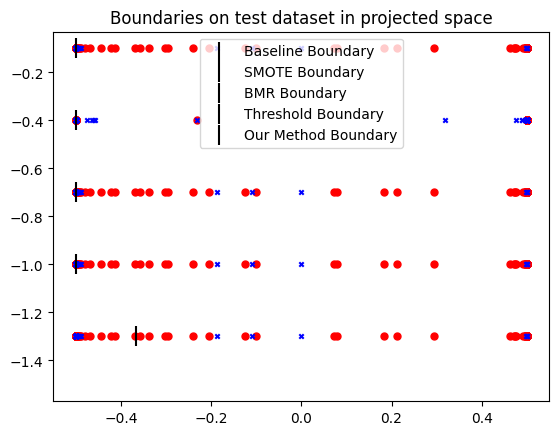

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9955 & 0.9955 & 0.9955 & 0.9955 \\
SMOTE & 0.9780 & 0.9778 & 0.9780 & 0.9784 \\
BMR & 0.9955 & 0.9955 & 0.9955 & 0.9955 \\
Threshold & 0.9955 & 0.9955 & 0.9955 & 0.9955 \\
Our Method & 0.9961 & 0.9961 & 0.9961 & 0.9961 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.995498,0.995492,0.995498,0.995482
SMOTE,0.977959,0.977759,0.977959,0.978387
BMR,0.995498,0.995492,0.995498,0.995482
Threshold,0.995498,0.995492,0.995498,0.995482
Our Method,0.996061,0.996057,0.996061,0.996050


In [27]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])